<a href="https://colab.research.google.com/github/ygebre1/bitcoin-price-predictor/blob/trial1/prediction_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task:
To build a machine learning model, first, download Bitcoin price data and gather relevant information from Wikipedia. Next, combine these datasets to create a comprehensive dataset for analysis. Finally, use this combined data to train and develop a machine learning model.

In [8]:
import yfinance as yf
import os
import pandas as pd

In [9]:
# Price of Bitcoin relative to the USD
btc_ticker = yf.Ticker("BTC-USD")

In [10]:
# This will give us everything from when Yahoo Finance started tracking
# Bitcoin through to the present.
btc = btc_ticker.history(period="max")

Since Bitcoin trades continuously without a set open or close price, the table may appear slightly unusual. Additionally, Yahoo Finance primarily tracks stocks, which have defined trading hours, dividends, and stock splits—none of which apply to Bitcoin.

In [11]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,96533.257812,96877.804688,95702.492188,96482.453125,22447526395,0.0,0.0
2025-02-09 00:00:00+00:00,96481.312500,97325.281250,94745.257812,96500.093750,27732901800,0.0,0.0
2025-02-10 00:00:00+00:00,96499.460938,98333.218750,95320.843750,97437.554688,40078962391,0.0,0.0


In [13]:
btc.index = pd.to_datetime(btc.index)

In [14]:
btc.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


In [15]:
del btc['Dividends']
del btc['Stock Splits']

In [16]:
btc.columns = [c.lower() for c in btc.columns]

In [17]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-02-08 00:00:00+00:00,96533.257812,96877.804688,95702.492188,96482.453125,22447526395
2025-02-09 00:00:00+00:00,96481.312500,97325.281250,94745.257812,96500.093750,27732901800
2025-02-10 00:00:00+00:00,96499.460938,98333.218750,95320.843750,97437.554688,40078962391


<Axes: xlabel='Date'>

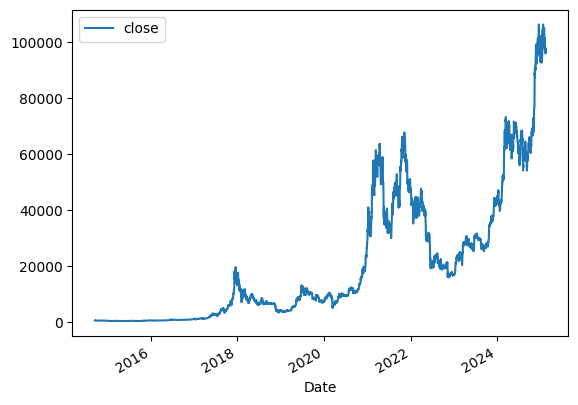

In [18]:
# By date, what did the closing price look like?
btc.plot.line(y='close', use_index=True)

In [ ]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)